In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\materials\course AI&ML track\materials\ML\6th (SUPERVISED )\REGRESSION\LogReg\Mental_health_project_folder\Student Depression Dataset.csv")

## DATA EXPLORATION

In [3]:
df.head(8)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0


In [4]:
df.tail(8)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27893,140672,Female,24.0,Hyderabad,Student,3.0,0.0,6.02,2.0,0.0,7-8 hours,Moderate,B.Arch,No,8.0,2.0,No,0
27894,140681,Male,23.0,Srinagar,Student,3.0,0.0,6.00,2.0,0.0,More than 8 hours,Healthy,MBBS,Yes,12.0,4.0,No,0
27895,140684,Male,31.0,Lucknow,Student,2.0,0.0,7.27,5.0,0.0,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.shape

(27901, 18)

In [7]:
df.describe().round(2)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27898.00,27901.00
mean,70442.15,25.82,3.14,0.00,7.66,2.94,0.00,7.16,3.14,0.59
std,40641.18,4.91,1.38,0.04,1.47,1.36,0.04,3.71,1.44,0.49
min,2.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,35039.00,21.00,2.00,0.00,6.29,2.00,0.00,4.00,2.00,0.00
50%,70684.00,25.00,3.00,0.00,7.77,3.00,0.00,8.00,3.00,1.00
75%,105818.00,30.00,4.00,0.00,8.92,4.00,0.00,10.00,4.00,1.00
max,140699.00,59.00,5.00,5.00,10.00,5.00,4.00,12.00,5.00,1.00


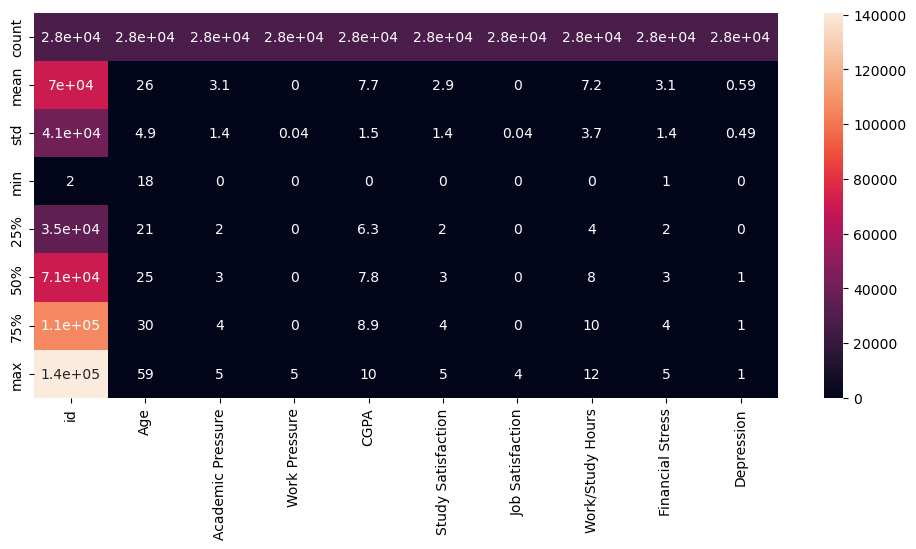

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.describe().round(2),annot=True)
plt.show()

# DATA PREPROCESSING

In [9]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
df['Financial Stress'].unique()

array([ 1.,  2.,  5.,  3.,  4., nan])

In [11]:
df['Financial Stress']=df['Financial Stress'].fillna(df['Financial Stress'].mean())

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [14]:
df.drop(columns=['id'],inplace=True)

In [15]:
df['Work Pressure'].unique()

array([0., 5., 2.])

In [16]:
df['Work Pressure'].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [17]:
df.drop(columns=['Work Pressure'],inplace=True)

In [18]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [19]:
df.drop(columns=['Job Satisfaction'],inplace=True)

In [20]:
df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [21]:
df.drop(columns=['Profession'],inplace=True)

In [22]:
df.rename(columns={'Depression Score':'Depression_Score','Academic Pressure':'Academic_Pressure','Study Satisfaction':'Study_Satisfaction','Sleep Duration':'Sleep_Duration','Dietary Habits':'Dietary_Habits','Have you ever had suicidal thoughts ?':'Have_you_ever_had_suicidal_thoughts_?','Work/Study Hours':'Work/Study_Hours','Financial_Stress':'Financial Stress','Family History of Mental Illness':'Family_History_of_Mental_Illness'},inplace=True)

In [23]:
df.head(10)

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial Stress,Family_History_of_Mental_Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,Male,29.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,Male,30.0,Thane,3.0,9.54,4.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,Female,30.0,Chennai,2.0,8.04,4.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,Male,28.0,Nagpur,3.0,9.79,1.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,Male,31.0,Nashik,2.0,8.38,3.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


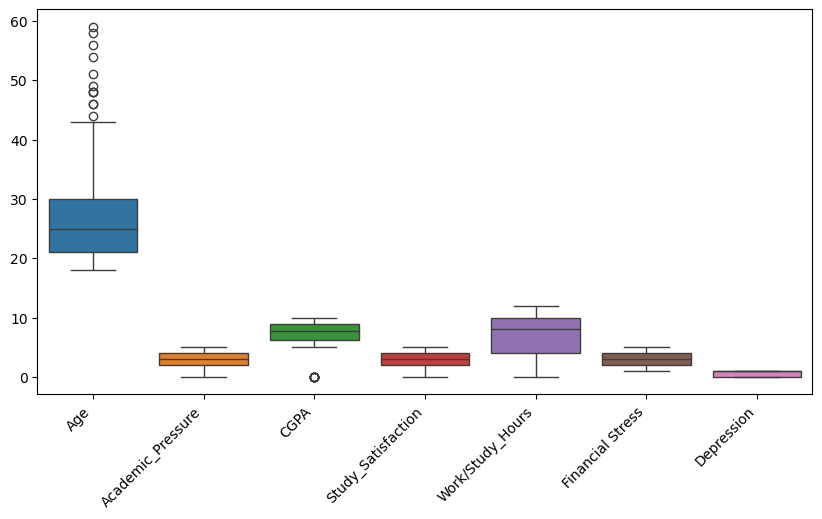

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

In [25]:
df[df['CGPA']==0]

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial Stress,Family_History_of_Mental_Illness,Depression
4365,Male,38.0,Chennai,0.0,0.0,0.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
10407,Male,28.0,Vadodara,3.0,0.0,4.0,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
11489,Female,32.0,Vadodara,5.0,0.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
13909,Female,20.0,Ahmedabad,0.0,0.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
14855,Male,21.0,Lucknow,0.0,0.0,0.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
20913,Male,18.0,Ahmedabad,0.0,0.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
21805,Male,34.0,Pune,1.0,0.0,5.0,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0
25746,Male,18.0,Rajkot,0.0,0.0,0.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
26719,Female,24.0,Meerut,0.0,0.0,0.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


In [26]:
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # نحافظ بس على القيم اللي جوه الحدود
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

In [27]:
filtered_df = remove_outliers_iqr(df, ["Age","CGPA"])

In [28]:
df.shape

(27901, 14)

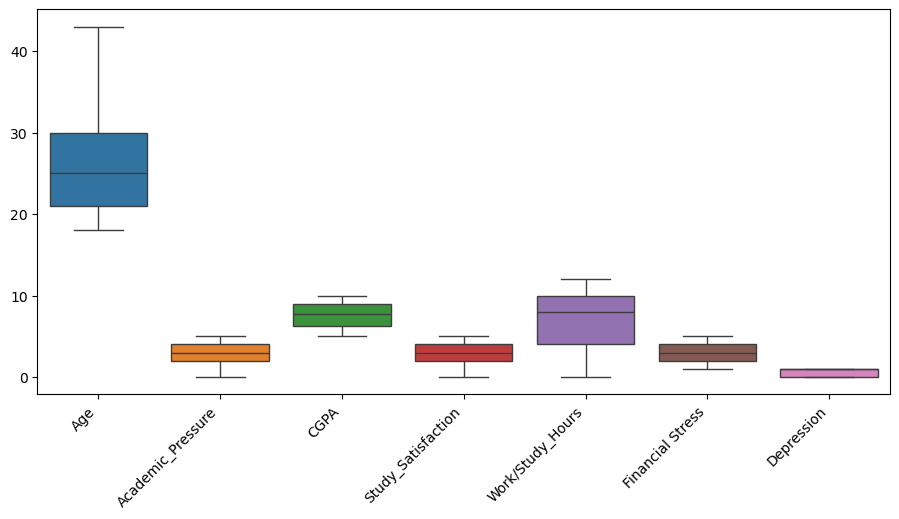

In [29]:
plt.figure(figsize=(11,5))
sns.boxplot(filtered_df)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

In [30]:
filtered_df.shape

(27880, 14)

# EDA

<Figure size 1500x700 with 0 Axes>

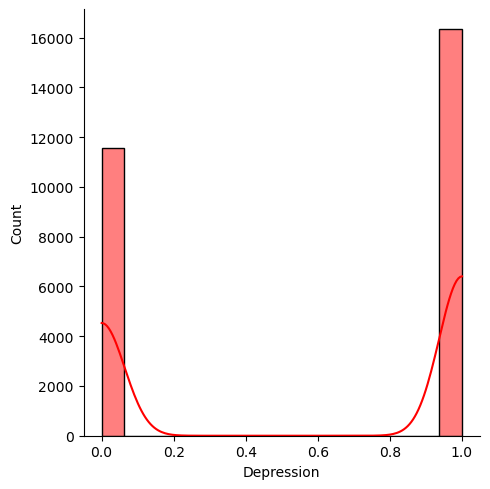

In [31]:
plt.figure(figsize=(15,7))
sns.displot(filtered_df['Depression'],kde=True,color='red')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

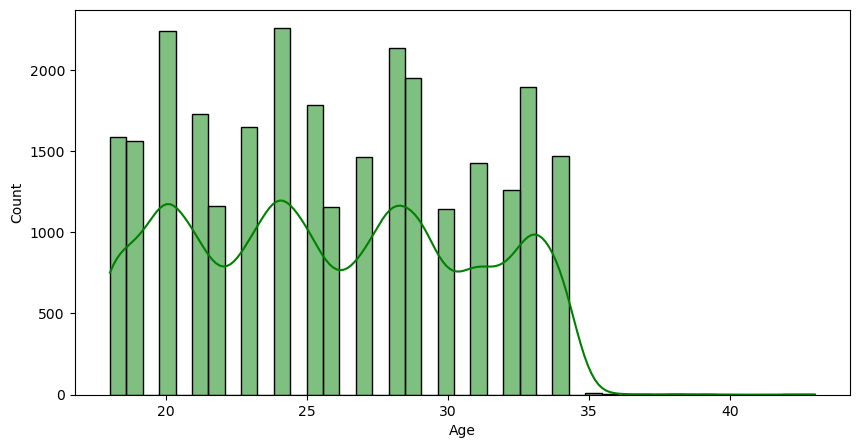

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(filtered_df['Age'],kde=True,color='green')

<Axes: xlabel='Age', ylabel='Depression'>

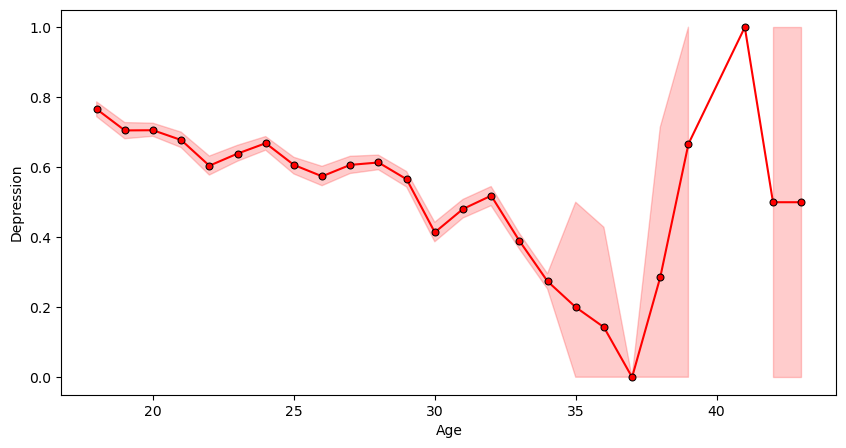

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(data=filtered_df,x='Age',y='Depression',color='red',marker='o',markersize=5,markeredgecolor='black')

<Axes: xlabel='Gender', ylabel='count'>

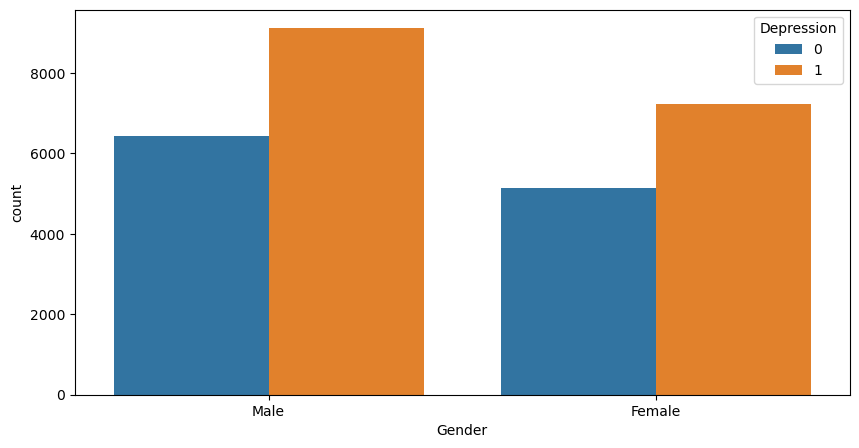

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=filtered_df,x='Gender',hue='Depression')

<Figure size 1000x500 with 0 Axes>

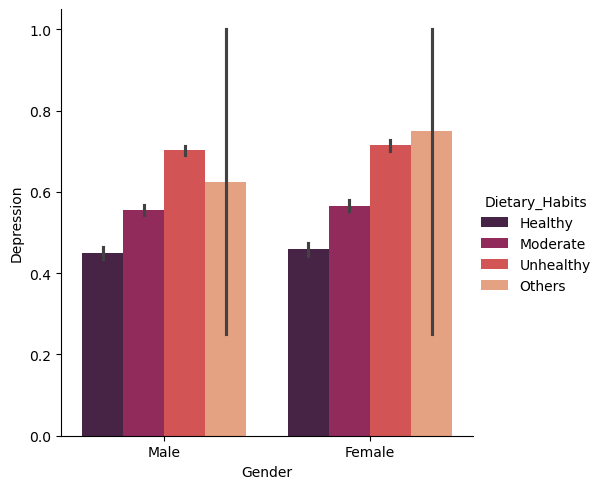

In [35]:
plt.figure(figsize=(10,5))
sns.catplot(data=filtered_df,x='Gender',y='Depression',kind='bar',color='red',palette='rocket',hue='Dietary_Habits')

<Axes: xlabel='CGPA', ylabel='Depression'>

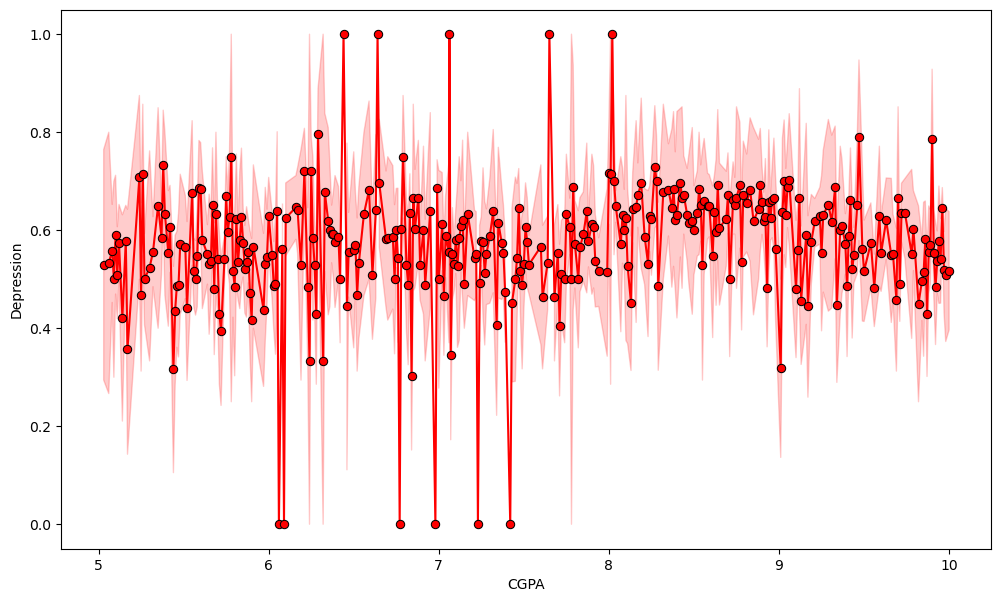

In [36]:
plt.figure(figsize=(12,7))
sns.lineplot(data=filtered_df,x='CGPA',y='Depression',color='red',marker='o',markeredgecolor='black')

<Axes: xlabel='Work/Study_Hours', ylabel='Depression'>

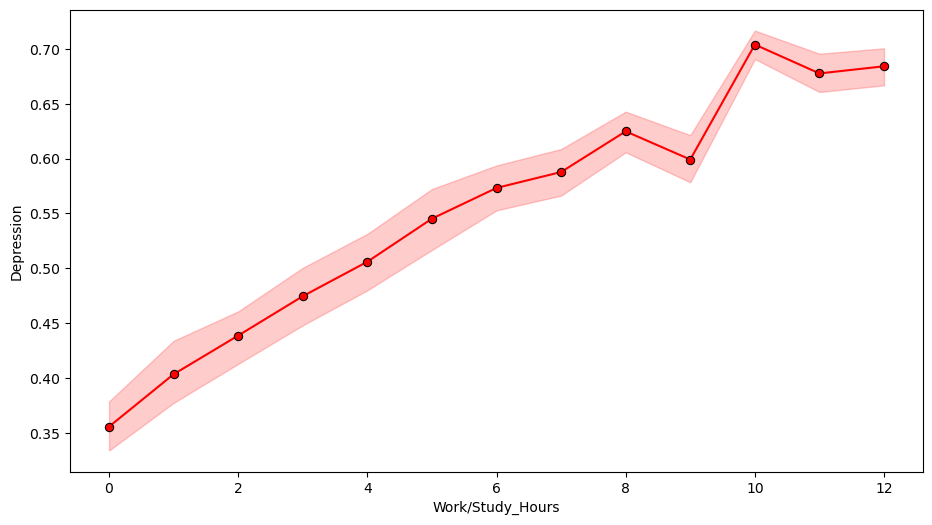

In [37]:
plt.figure(figsize=(11,6))
sns.lineplot(data=filtered_df,x='Work/Study_Hours',y='Depression',color='red',marker='o',markeredgecolor='black')

<Axes: xlabel='Academic_Pressure', ylabel='Depression'>

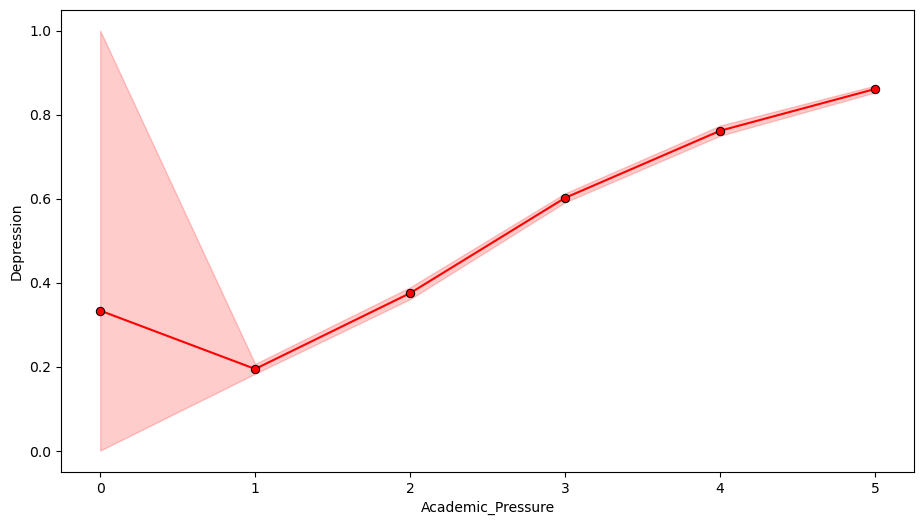

In [38]:
plt.figure(figsize=(11,6))
sns.lineplot(data=filtered_df,x='Academic_Pressure',y='Depression',color='red',marker='o',markeredgecolor='black')

<Axes: xlabel='Financial Stress', ylabel='Depression'>

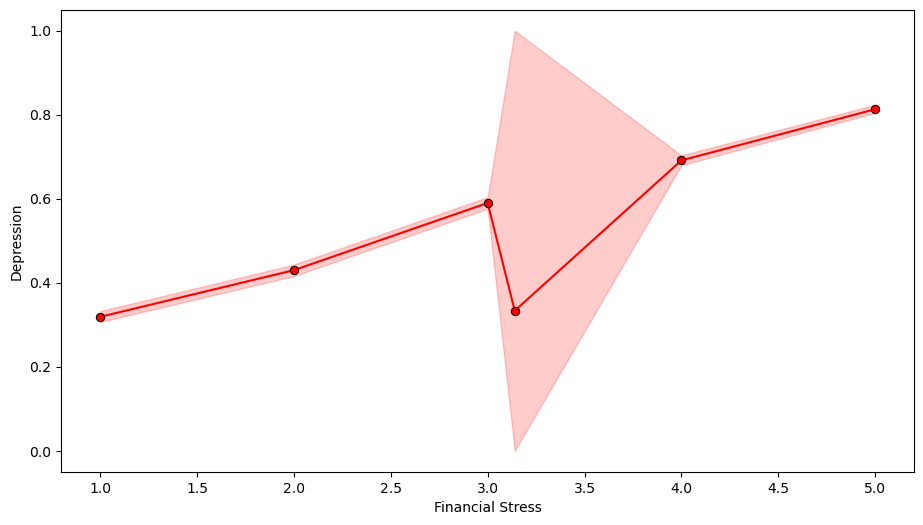

In [39]:
plt.figure(figsize=(11,6))
sns.lineplot(data=filtered_df,x='Financial Stress',y='Depression',color='red',marker='o',markeredgecolor='black')
#

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, 'Visakhapatnam'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Srinagar'),
  Text(3, 0, 'Varanasi'),
  Text(4, 0, 'Jaipur'),
  Text(5, 0, 'Pune'),
  Text(6, 0, 'Thane'),
  Text(7, 0, 'Chennai'),
  Text(8, 0, 'Nagpur'),
  Text(9, 0, 'Nashik'),
  Text(10, 0, 'Vadodara'),
  Text(11, 0, 'Kalyan'),
  Text(12, 0, 'Rajkot'),
  Text(13, 0, 'Ahmedabad'),
  Text(14, 0, 'Kolkata'),
  Text(15, 0, 'Mumbai'),
  Text(16, 0, 'Lucknow'),
  Text(17, 0, 'Indore'),
  Text(18, 0, 'Surat'),
  Text(19, 0, 'Ludhiana'),
  Text(20, 0, 'Bhopal'),
  Text(21, 0, 'Meerut'),
  Text(22, 0, 'Agra'),
  Text(23, 0, 'Ghaziabad'),
  Text(24, 0, 'Hyderabad'),
  Text(25, 0, 'Vasai-Virar'),
  Text(26, 0, 'Kanpur'),
  T

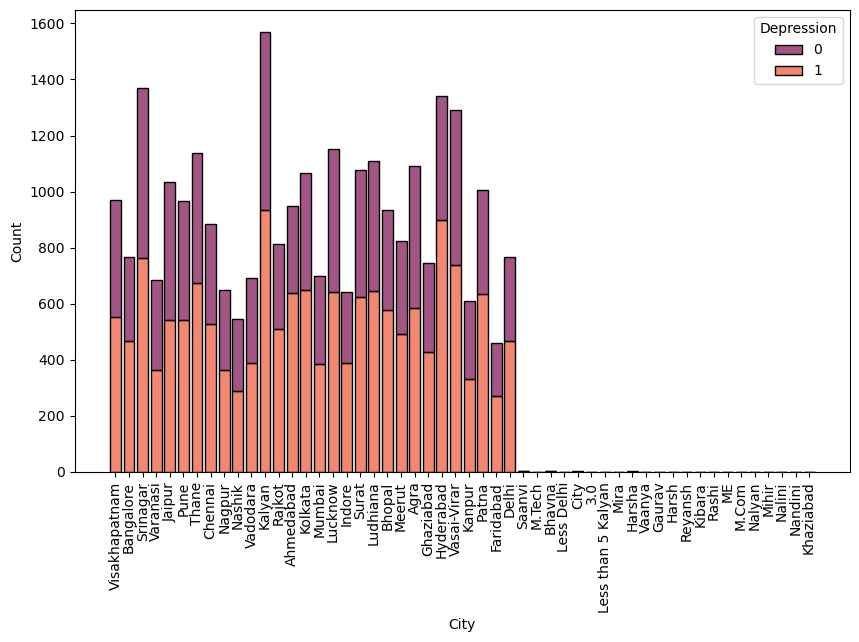

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df,x='City',hue='Depression',multiple='stack',palette='rocket',shrink=.8,edgecolor='black',linewidth=1)
plt.xticks(rotation=90)

<Figure size 1000x600 with 0 Axes>

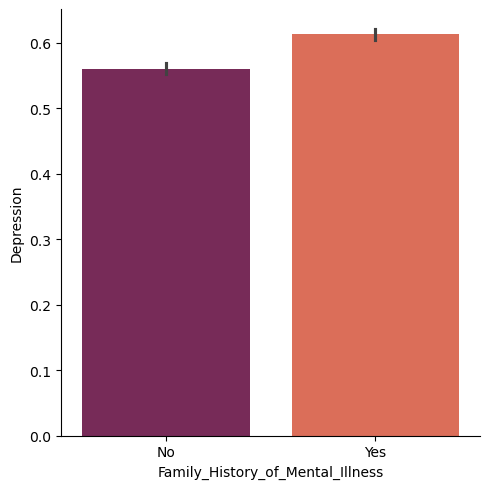

In [41]:
plt.figure(figsize=(10,6))
sns.catplot(data=filtered_df,x='Family_History_of_Mental_Illness',y='Depression',kind='bar',color='red',palette='rocket')

([0, 1, 2, 3, 4],
 [Text(0, 0, '5-6 hours'),
  Text(1, 0, 'Less than 5 hours'),
  Text(2, 0, '7-8 hours'),
  Text(3, 0, 'More than 8 hours'),
  Text(4, 0, 'Others')])

<Figure size 1500x700 with 0 Axes>

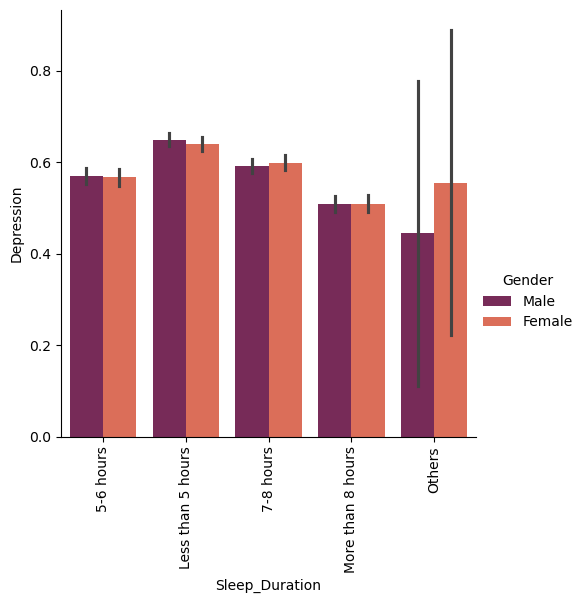

In [42]:
plt.figure(figsize=(15,7))
sns.catplot(data=filtered_df,x='Sleep_Duration',y='Depression',kind='bar',color='red',palette='rocket',hue='Gender')
plt.xticks(rotation=90)

# FEATURE ENGENERING

In [43]:
ln=LabelEncoder()

In [44]:
filtered_df.drop(columns=['Degree','City'],inplace=True)

In [45]:
filtered_df.head(3)

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial Stress,Family_History_of_Mental_Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0


In [46]:
filtered_df['Gender']=ln.fit_transform(filtered_df['Gender'])
filtered_df['Dietary_Habits']=ln.fit_transform(filtered_df['Dietary_Habits'])
filtered_df['Family_History_of_Mental_Illness']=ln.fit_transform(filtered_df['Family_History_of_Mental_Illness'])
filtered_df['Have_you_ever_had_suicidal_thoughts_?']=ln.fit_transform(filtered_df['Have_you_ever_had_suicidal_thoughts_?'])
filtered_df['Sleep_Duration']=filtered_df['Sleep_Duration'].map({'Less than 5 hours':0,'5-6 hours':1,'7-8 hours':2,'More than 8 hours':3,'Others':4})

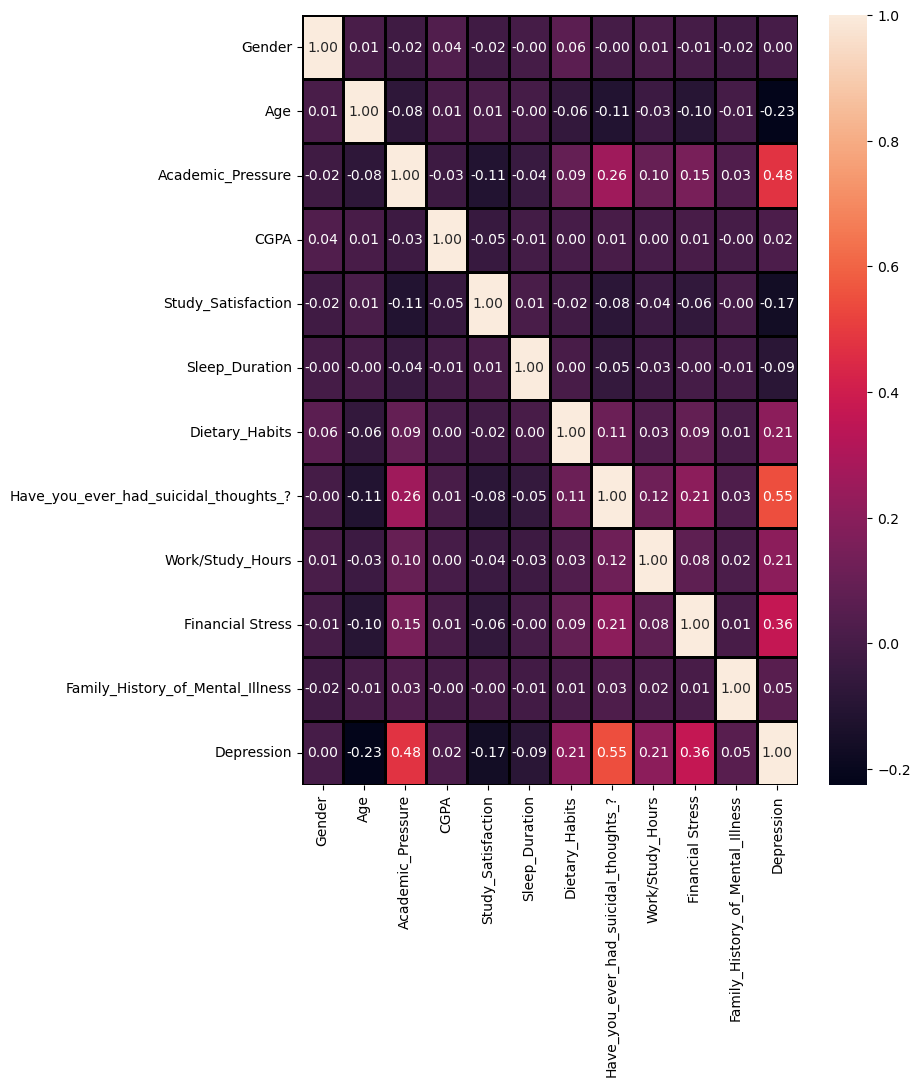

In [47]:
plt.figure(figsize=(8,10))
sns.heatmap(filtered_df.corr(),annot=True,cmap='rocket',linewidths=1,linecolor='black',fmt='.2f')
plt.show()

In [48]:
x=filtered_df.drop(columns=['Depression'])
y=filtered_df['Depression']
# X: الميزات، y: الهدف
selector = SelectKBest(score_func=f_classif, k='all')  # أو حدد k=5 لو عايز بس أعلى 5
fit = selector.fit(x,y)
# نتائج التقييم
feature_scores = pd.DataFrame({
    'Feature': x.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)
print(feature_scores)

                                  Feature         Score
7   Have_you_ever_had_suicidal_thoughts_?  11873.246058
2                       Academic_Pressure   8124.410886
9                        Financial Stress   4252.547670
1                                     Age   1496.357020
8                        Work/Study_Hours   1265.560970
6                          Dietary_Habits   1246.497392
4                      Study_Satisfaction    810.412266
5                          Sleep_Duration    213.321440
10       Family_History_of_Mental_Illness     80.300338
3                                    CGPA     13.443123
0                                  Gender      0.095080


In [49]:
filtered_df.head(3)

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial Stress,Family_History_of_Mental_Illness,Depression
0,1,33.0,5.0,8.97,2.0,1,0,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,1,1,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,0,0,0,9.0,1.0,1,0


In [50]:
sc=StandardScaler()

In [51]:
filtered_df['Age']=sc.fit_transform(filtered_df[['Age']])
filtered_df['CGPA']=sc.fit_transform(filtered_df[['CGPA']])
filtered_df['Work/Study_Hours']=sc.fit_transform(filtered_df[['Work/Study_Hours']])
filtered_df['Academic_Pressure']=sc.fit_transform(filtered_df[['Academic_Pressure']])
filtered_df['Financial Stress']=sc.fit_transform(filtered_df[['Financial Stress']])
filtered_df['Study_Satisfaction']=sc.fit_transform(filtered_df[['Study_Satisfaction']])

In [52]:
filtered_df.head(3)

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial Stress,Family_History_of_Mental_Illness,Depression
0,1,1.473680,1.345489,0.895397,-0.694231,1,0,1,-1.121530,-1.488452,0,1
1,0,-0.371398,-0.827202,-1.200778,1.510899,1,1,0,-1.121530,-0.792741,1,0
2,1,1.063663,-0.102972,-0.429221,1.510899,0,0,0,0.496952,-1.488452,1,0


# MODELING

In [53]:
x=filtered_df.drop(columns=['Depression'])
y=filtered_df['Depression']

In [54]:
lr=LogisticRegression()
svm=SVC(C=10,kernel='linear')
kn=KNeighborsClassifier(n_neighbors=1)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
lr.fit(x_train,y_train)
svm.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [57]:
accuracy_score(y_test,lr.predict(x_test))

0.8463055954088953

In [58]:
accuracy_score(y_test,svm.predict(x_test))

0.8479196556671449

In [59]:
x_new = filtered_df.drop(columns=['Depression','Family_History_of_Mental_Illness','Gender','CGPA'])
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=42)

In [60]:
lr.fit(x_train,y_train)
svm.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [61]:
accuracy_score(y_test,lr.predict(x_test))

0.8472022955523673

In [62]:
accuracy_score(y_test,svm.predict(x_test))

0.8495337159253945

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print(scores)

[0.84020803 0.8516858  0.84522956 0.84379484 0.85222382]


In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x, y, cv=5, scoring='accuracy')
print(scores)

[0.84020803 0.85150646 0.84397418 0.84397418 0.8516858 ]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2332
           1       0.85      0.89      0.87      3244

    accuracy                           0.85      5576
   macro avg       0.85      0.84      0.84      5576
weighted avg       0.85      0.85      0.85      5576



In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2332
           1       0.85      0.89      0.87      3244

    accuracy                           0.85      5576
   macro avg       0.85      0.84      0.84      5576
weighted avg       0.85      0.85      0.85      5576



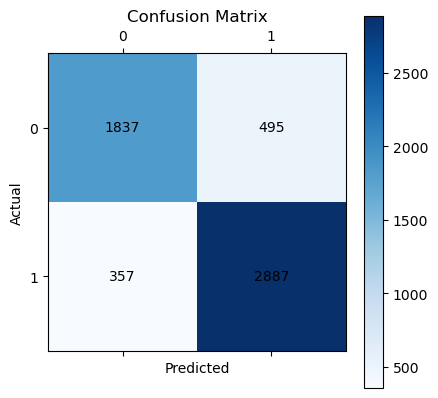

In [67]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()

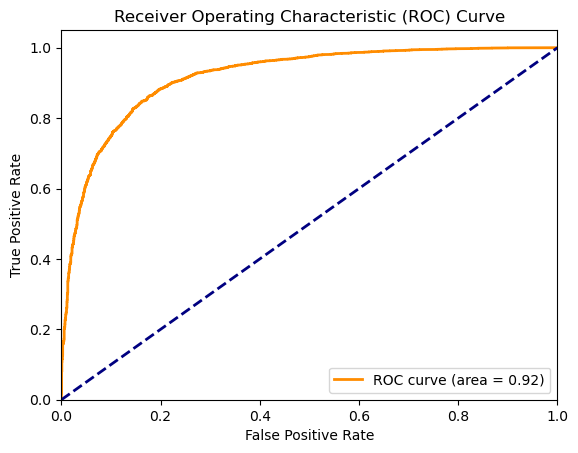

In [68]:
from sklearn.metrics import roc_curve, auc
y_probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

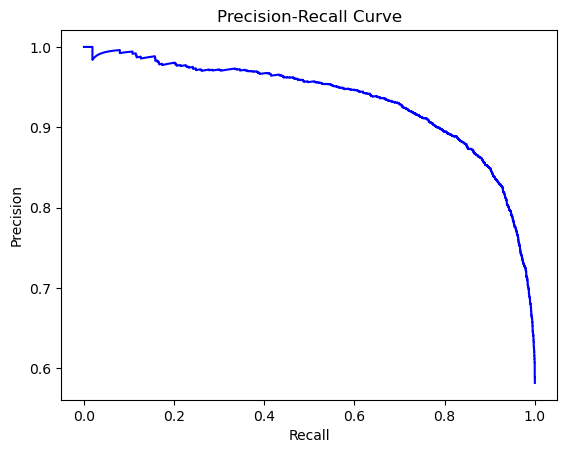

In [69]:
from sklearn.metrics import precision_recall_curve
y_probs = lr.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [70]:
import joblib # Import the joblib library
joblib.dump(lr, "logreg_model.pkl")
joblib.dump(svm, "svm_model.pkl")

['svm_model.pkl']

In [71]:
filtered_df.to_csv('preprocessed_data.csv', index=False)